# ME2105 Meteorologi Dinamik I (Semester III 2019/2020)
# Teori Dinamika Monsun

## Sesi Ke-8 : Sirkulasi Angin dan Transpor Kelembapan



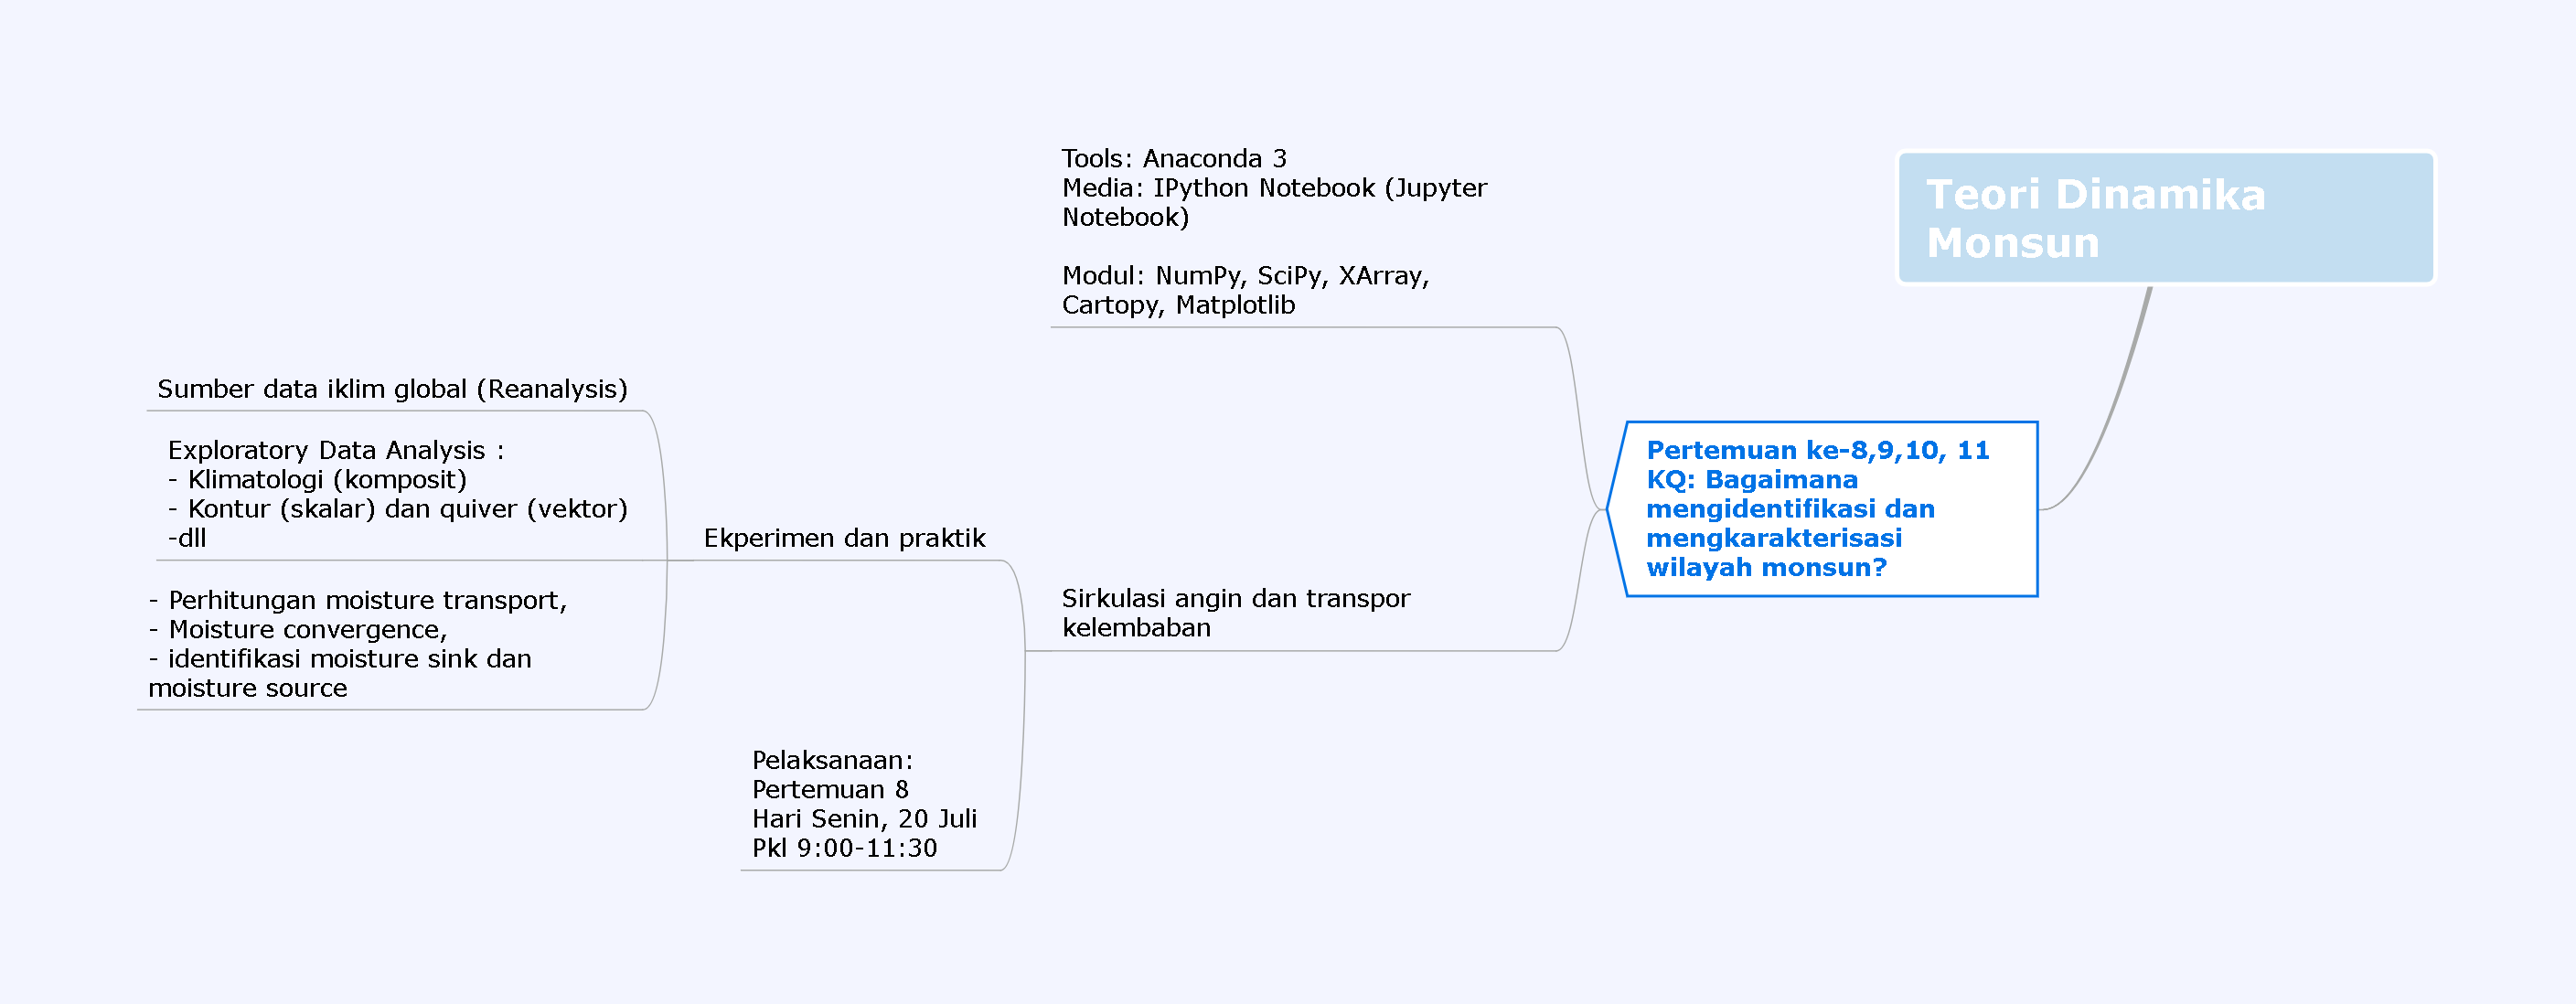
### <center> Mind Map Pertemuan 8 </center>



Pada sesi ini kita akan bereksperimen dengan Python 3 untuk mendapatkan gambaran mengenai sirkulasi angin dan transpor kelembapan yang berhubungan dengan Monsun. Dalam eksperimen ini kita akan menggunakan beberapa variabel iklim yang bersumber dari dataset Reanalysis Global. 

## Data Reanalysis Global

Data Reanalysis merupakan dataset yang seringkali menjadi pilihan utama dalam mendukung analisis iklim global. Reanalysis merupakan dataset yang dihasilkan oleh model-model global yang di-"freeze" untuk suatu periode waktu tertentu dan diasimilasikan dengan berbagai data observasi global. Website [UCAR Climate Data Guide](https://climatedataguide.ucar.edu/climate-data/atmospheric-reanalysis-overview-comparison-tables) telah mengkompilasi informasi dari banyak dataset Reanalysis Global yang tersedia. Anda  disarankan mengunjungi website tersebut untuk mendapatkan gambaran awal mengenai kelebihan dan keterbatasan dari berbagai dataset Global.

Secara umum, beberapa kelebihan dan keterbatasan dari dataset Reanalysis Global, dikutip dari [UCAR Climate Data Guide](https://climatedataguide.ucar.edu/climate-data/atmospheric-reanalysis-overview-comparison-tables):

> <b>KEY STRENGTHS</b>:
   - Global data sets, consistent spatial and temporal resolution over 3 or more decades, hundreds of variables available; model resolution and biases have steadily improved
   - Reanalyses incorporate millions of observations into a stable data assimilation system that would be nearly impossible for an individual to collect and analyze separately, enabling a number of climate processes to be studied
   - Reanalysis data sets are relatively straightforward to handle from a processing standpoint (although file sizes can be very large)

> <b>KEY LIMITATIONS</b>:
   - Observational constraints, and therefore reanalysis reliability, can considerably vary depending on the location, time period, and variable considered
   - The changing mix of observations, and biases in observations and models, can introduce spurious variability and trends into reanalysis output
   - Diagnostic variables relating to the <u>hydrological cycle, such as precipitation and evaporation, should be used with extreme caution</u>

## NCEP/NCAR Reanalysis (R1)

[NCEP-NCAR (R1)](https://psl.noaa.gov/data/reanalysis/reanalysis.shtml) merupakan pelopor dari data Reanalysis Global yang sering disebut sebagai Reanalysis generasi pertama. Dataset ini telah digunakan oleh banyak publikasi, sehingga dapat menjadi pilihan awal untuk analisa iklim global. Namun NCAR Climate Data Guide sendiri menyebut salah satu limitasi dataset ini adalah  model dan skema asimilasinya yang "antiquated" dan lebih menyarankan untuk menggunakan dataset dari generasi kedua atau ketiga.

Alasan dipilihnya dataset ini dalam eksperimen kita murni karena alasan teknis. NCEP/NCAR Reanalysis adalah salah satu data Reanalysis yang tersedia cukup panjang, ukurannya relatif lebih kecil dan variabelnya cukup lengkap.

Variabel iklim dari NCEP/NCAR Reanalysis (R1)  yang digunakan mencakup:
    

#### 1. Kelembapan Spesifik
    Diunduh dari: 
    ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/pressure/shum.mon.mean.nc

#### 2. Angin zonal dan meridional
    Diunduh dari:
    ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.mean.nc
    ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.mean.nc

#### 3. Presipitasi
    Diunduh dari:
    ftp://ftp2.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface_gauss/prate.sfc.mon.mean.nc

#### 4. Evaporasi 
    Diunduh dari:
    ftp://ftp2.psl.noaa.gov/Datasets/ncep.reanalysis.derived/surface_gauss/pevpr.sfc.mon.mean.nc1. 


In [2]:
!dir Data

pevpr.sfc.mon.mean.nc  shum.mon.mean.nc  uwnd.mon.mean.nc
prate.sfc.mon.mean.nc  sst.mnmean.nc	 vwnd.mon.mean.nc


## Klimatologi angin dan hujan

Eksperimen pertama adalah  menggambarkan klimatologi angin dan curah hujan dari data Reanalysis Global. Di sini kita akan  mencoba menunjukkan sirkulasi angin dan variasi curah hujan secara spasial yang dapat diidentifikasi sebagai fenomena monsun. 

###  Python Package: XARRAY 

Untuk memproses dataset Reanalysis dengan format NetCDF, kita akan menggunakan package yang disebut [xarray](http://xarray.pydata.org/en/stable/index.html). XARRAY merupakan package python yang didesain, mengutip dari  developernya:
> that makes working with labelled multi-dimensional arrays simple, efficient, and fun

Banyak video tutorial tentang XARRAY yang tersedia, salah satunya yang saya rekomendasikan untuk pemula adalah seri tutorial dari [CLEX CMS](https://www.youtube.com/watch?v=zoB54IpofYA&list=PLTJsu1ustEMbVgE6SivbF17XvWmb3hqoR)

Video pertamanya dapat anda lihat di bawah ini.

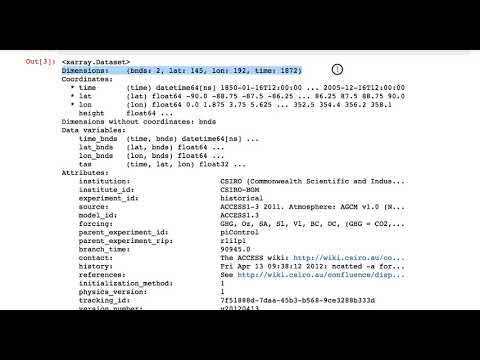

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("zoB54IpofYA",width=400, height=300)

In [4]:
import numpy as np
import xarray as xr

### Buka data

Mengakses data dengan menggunakan fungsi `xarray.open_dataset`

In [5]:
#dataset 1: uwnd
fU=xr.open_dataset('Data/uwnd.mon.mean.nc')
#dataset 2: vwnd
fV=xr.open_dataset('Data/vwnd.mon.mean.nc')
#dataset 3: Precipitation
fPr=xr.open_dataset('Data/prate.sfc.mon.mean.nc')

In [6]:
pr=fPr.prate.data
type(pr) 
# type(fPr)
# pr

numpy.ndarray

In [7]:
fPr

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 870)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-06-01
Data variables:
    prate    (time, lat, lon) float32 1.9127938e-06 ... 3.5166668e-06
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121013
    history:        Mon Jul  5 23:55:54 1999: ncrcat prate.mon.mean.nc /Datas...
    title:          monthly mean prate.sfc from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [8]:
fPr.prate.data.shape

(870, 94, 192)

In [9]:
fPr.prate.data[0,:,:].shape

(94, 192)

### Subsetting dan Indexing

Fitur XARRAY yang cukup powerful adalah kemudahan dalam operasi *subsetting, slicing* dan *indexing* pada data geospasial. Anda dapat mempelajari dengan lebih lengkap teknik *slicing* di [dokumentasi xarry](http://xarray.pydata.org/en/stable/indexing.html)

Video dibawah ini menunjukkan beberapa teknik dasar *subsetting* dalam XARRAY

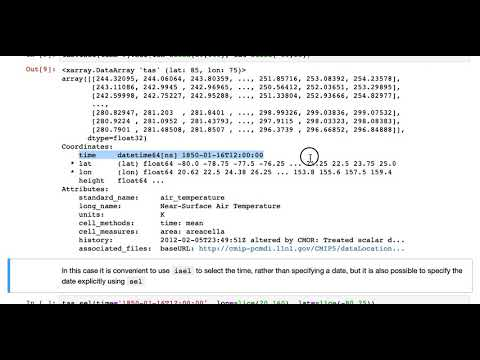

In [10]:
YouTubeVideo("TDLOF188XP8",width=400, height=300)

Kita coba menggambarkan klimatologi angin di permukaan terlebih dahulu. Untuk itu data angin kita  *slice* di level tekanan 1000 mb. Di sini kita menggunakan operator `DataArray.sel()` dengan me-refer pada koordinat `level` 

In [11]:
fU.uwnd.data[:,2,:,:]

array([[[-1.9199982 , -1.8600006 , -1.800003  , ..., -2.0899963 ,
         -2.0400085 , -1.9799957 ],
        [-1.3200073 , -1.2299957 , -1.1399994 , ..., -1.5599976 ,
         -1.4799957 , -1.4100037 ],
        [-0.22000122, -0.11000061,  0.        , ..., -0.47000122,
         -0.40000916, -0.32000732],
        ...,
        [ 0.16000366,  0.25      ,  0.33999634, ..., -0.04000854,
          0.02000427,  0.08999634],
        [-0.15000916, -0.1000061 , -0.05000305, ..., -0.27999878,
         -0.2400055 , -0.19999695],
        [-0.25      , -0.2400055 , -0.22999573, ..., -0.29000854,
         -0.27000427, -0.2599945 ]],

       [[-2.0700073 , -1.9900055 , -1.9000092 , ..., -2.300003  ,
         -2.2299957 , -2.149994  ],
        [ 1.0099945 ,  1.1199951 ,  1.2200012 , ...,  0.6799927 ,
          0.7899933 ,  0.8999939 ],
        [ 2.9299927 ,  3.0399933 ,  3.1600037 , ...,  2.649994  ,
          2.7200012 ,  2.819992  ],
        ...,
        [-2.3399963 , -2.0899963 , -1.8500061 , ..., -

In [12]:
prate=fPr.prate
uwnd=fU.uwnd.sel(level=850)
vwnd=fV.vwnd.sel(level=850)

In [13]:
fV.vwnd

<xarray.DataArray 'vwnd' (time: 870, level: 17, lat: 73, lon: 144)>
[155472480 values with dtype=float32]
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-06-01
Attributes:
    long_name:     Monthly mean v wind
    units:         m/s
    precision:     2
    var_desc:      v-wind
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-125.  160.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-68.57001  68.56999]

In [14]:
uwnd

<xarray.DataArray 'uwnd' (time: 870, lat: 73, lon: 144)>
array([[[-1.919998, -1.860001, ..., -2.040009, -1.979996],
        [-1.320007, -1.229996, ..., -1.479996, -1.410004],
        ...,
        [-0.150009, -0.100006, ..., -0.240005, -0.199997],
        [-0.25    , -0.240005, ..., -0.270004, -0.259995]],

       [[-2.070007, -1.990005, ..., -2.229996, -2.149994],
        [ 1.009995,  1.119995, ...,  0.789993,  0.899994],
        ...,
        [-3.020004, -2.850006, ..., -3.330002, -3.180008],
        [-1.240005, -1.119995, ..., -1.470001, -1.360001]],

       ...,

       [[ 2.572582,  2.559678, ...,  2.580645,  2.580646],
        [-0.204838, -0.203225, ..., -0.18387 , -0.19516 ],
        ...,
        [-4.814515, -4.420161, ..., -5.559677, -5.197581],
        [-0.774999, -0.43387 , ..., -1.459677, -1.115322]],

       [[ 6.691667,  6.484167, ...,  7.065001,  6.886667],
        [ 6.743334,  6.595   , ...,  7.019168,  6.885834],
        ...,
        [-4.141666, -3.676666, ..., -5.022499, -4.591665],
        [ 0.135001,  0.491668, ..., -0.587499, -0.227499]]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-06-01
Attributes:
    long_name:     Monthly mean u wind
    units:         m/s
    precision:     2
    var_desc:      u-wind
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    valid_range:   [-125.  160.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-68.194824 124.399994]

In [15]:
prate

<xarray.DataArray 'prate' (time: 870, lat: 94, lon: 192)>
array([[[1.912794e-06, 1.883765e-06, ..., 2.041827e-06, 1.970859e-06],
        [2.224659e-07, 2.224659e-07, ..., 2.353692e-07, 2.160143e-07],
        ...,
        [2.370862e-06, 2.690215e-06, ..., 1.854729e-06, 2.080537e-06],
        [3.183771e-06, 3.338611e-06, ..., 2.880543e-06, 3.048286e-06]],

       [[2.179207e-06, 2.141271e-06, ..., 2.348169e-06, 2.299893e-06],
        [1.568861e-06, 1.475753e-06, ..., 1.820583e-06, 1.689548e-06],
        ...,
        [1.619538e-07, 1.895402e-07, ..., 1.343674e-07, 1.550572e-07],
        [2.034378e-06, 2.089551e-06, ..., 1.958515e-06, 1.992998e-06]],

       ...,

       [[3.967742e-06, 3.838710e-06, ..., 4.217742e-06, 4.112903e-06],
        [2.459678e-06, 2.282258e-06, ..., 2.870968e-06, 2.645161e-06],
        ...,
        [5.725807e-07, 9.193549e-07, ..., 2.419355e-07, 3.790322e-07],
        [2.790323e-06, 2.862903e-06, ..., 2.596774e-06, 2.669355e-06]],

       [[1.623333e-05, 1.624167e-05, ..., 1.620833e-05, 1.622500e-05],
        [8.166667e-06, 7.975001e-06, ..., 8.791667e-06, 8.450001e-06],
        ...,
        [9.999999e-08, 2.000000e-07, ..., 1.666667e-08, 4.166667e-08],
        [3.558333e-06, 3.625000e-06, ..., 3.441666e-06, 3.516667e-06]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-06-01
Attributes:
    long_name:     Monthly Mean of Precipitation Rate
    valid_range:   [-400.  700.]
    units:         Kg/m^2/s
    precision:     1
    var_desc:      Precipitation Rate
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-2.3283064e-10  5.8903999e-04]

### Grouping dan Resampling

Fitur lainnya dalam XARRAY adalah [*grouping*](http://xarray.pydata.org/en/stable/groupby.html) melalui operator `DataSet.groupby()` atau `DataArray.groupby()`. Metode *grouping* dalam XARRAY mengadopsi teknik yang diimplementasikan pada package PANDA, yang disebut  

> <b>*split-apply-combine strategy*</b>:
  - Split your data into multiple independent groups.
  - Apply some function to each group.
  - Combine your groups back into a single data object.

Contoh aplikasi "grouping" dapat dilihat di [dokumentasi XARRAY](http://xarray.pydata.org/en/stable/examples/monthly-means.html). Video di bawah ini mengilustrasikan beberapa teknik *grouping*


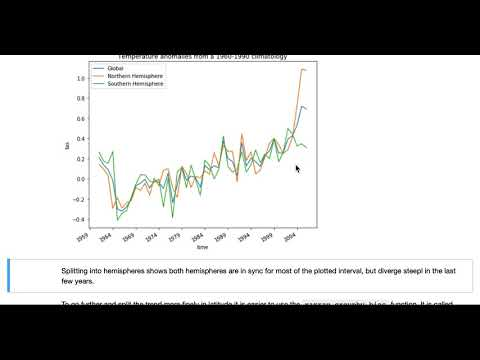

In [16]:
YouTubeVideo("55yn1HwCsEs",width=400, height=300)

### Menghitung klimatologi

Di sini kita akan mengimplementasikan teknik *grouping* untuk menghitung klimatologi musim dari data angin dan curah hujan

In [17]:
#Hitung akumulasi curah hujan bulanan
ndays = prate.time.dt.days_in_month
prec=prate*3600*24*ndays

In [18]:
#klimatologi
uclim=uwnd.groupby('time.season').mean(dim='time')
vclim=vwnd.groupby('time.season').mean(dim='time')
prclim=prec.groupby('time.season').mean(dim='time')

In [19]:
prclim

<xarray.DataArray (season: 4, lat: 94, lon: 192)>
array([[[ 7.00405573,  6.83969736,  6.68064955, ...,  7.60095041,
          7.3907763 ,  7.18884471],
        [ 5.79686612,  5.62224233,  5.47607594, ...,  6.47144269,
          6.20762455,  5.97959527],
        [16.27104246, 16.87641934, 17.58071971, ..., 14.87438926,
         15.27620978, 15.74150271],
        ...,
        [ 0.98645646,  1.84493307,  3.64091336, ...,  0.34596098,
          0.42887414,  0.59816835],
        [ 0.88273468,  1.04959105,  1.27254797, ...,  0.60652999,
          0.67394628,  0.76226904],
        [ 4.4874386 ,  4.66418289,  4.86716587, ...,  4.06691036,
          4.19096215,  4.32779579]],

       [[29.80313239, 29.48138014, 29.18889486, ..., 30.80431796,
         30.45535415, 30.12759108],
        [23.04211691, 22.32049464, 21.68911726, ..., 25.62578179,
         24.68215001, 23.83025102],
        [24.44050962, 25.0496321 , 25.80189205, ..., 23.63330571,
         23.73678713, 24.01324673],
        ...,
        [ 2.18737032,  4.53744471,  8.81277199, ...,  0.34147942,
          0.5323983 ,  1.03185198],
        [ 0.61821991,  0.78124649,  1.00053229, ...,  0.35569235,
          0.41394357,  0.49682057],
        [ 3.49261191,  3.58064526,  3.68424692, ...,  3.30842342,
          3.35767537,  3.42199839]],

       [[ 9.22991503,  9.05804261,  8.8918516 , ...,  9.80587691,
          9.6033295 ,  9.41084332],
        [ 6.78634643,  6.55533447,  6.37703073, ...,  7.72353311,
          7.37633331,  7.06578568],
        [13.68460976, 14.24303595, 14.88119365, ..., 12.42314749,
         12.77496097, 13.20885634],
        ...,
        [ 1.58154791,  3.41300247,  7.02290235, ...,  0.29748821,
          0.42062017,  0.75711153],
        [ 0.55146374,  0.6856213 ,  0.876432  , ...,  0.33486877,
          0.3794503 ,  0.44797928],
        [ 3.51021019,  3.64138913,  3.79320161, ...,  3.2010213 ,
          3.28706719,  3.3873947 ]],

       [[13.24007584, 13.05181613, 12.87271596, ..., 13.8863789 ,
         13.65389732, 13.44105717],
        [10.70148614, 10.49344557, 10.34046491, ..., 11.58553011,
         11.24586908, 10.94524638],
        [21.35174171, 22.02268358, 22.78764531, ..., 19.94437905,
         20.33081927, 20.81036133],
        ...,
        [ 1.30773373,  2.77670471,  5.61925893, ...,  0.26798009,
          0.36312166,  0.63450672],
        [ 0.46680246,  0.57520388,  0.71568501, ...,  0.30330049,
          0.33902072,  0.39020129],
        [ 2.7214198 ,  2.80042037,  2.89778147, ...,  2.5485177 ,
          2.5929779 ,  2.65177892]]])
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

### Gambar dengan Cartopy

Untuk visualisai kita menggunakan package [Cartopy](https://scitools.org.uk/cartopy/docs/latest/index.html#), suatu package pengolahan data Geospasial untuk menghasilkan peta dan melakukan berbagai analisa geospasial. Beberapa contoh visualisasi dengan cartopy bisa dilihat di [sini](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html).

Package cartopy terdiri atas berbagai fitur visualisasi geospasial, namun secara umumlangkah-langkah visualisasi pada Cartopy dapat dibagi menjadi 3 tahap:
   1. Menentukan proyeksi peta dengan `cartopy.crs()`. Cartopy mendukung berbagai [proyeksi peta](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html)
   2. Menggambar dengan meproyeksikan data ke CRS yang telah ditentukan sebelumnya. Gambar sendiri dibuat menggunakan fungsi-fungsi visualisasi dari `matplotlib.pyplot`
   3. Menambahkan fitur-fitur spasial pada peta dengan `cartopy.feature`


In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [21]:
#projection
mproj=ccrs.PlateCarree()


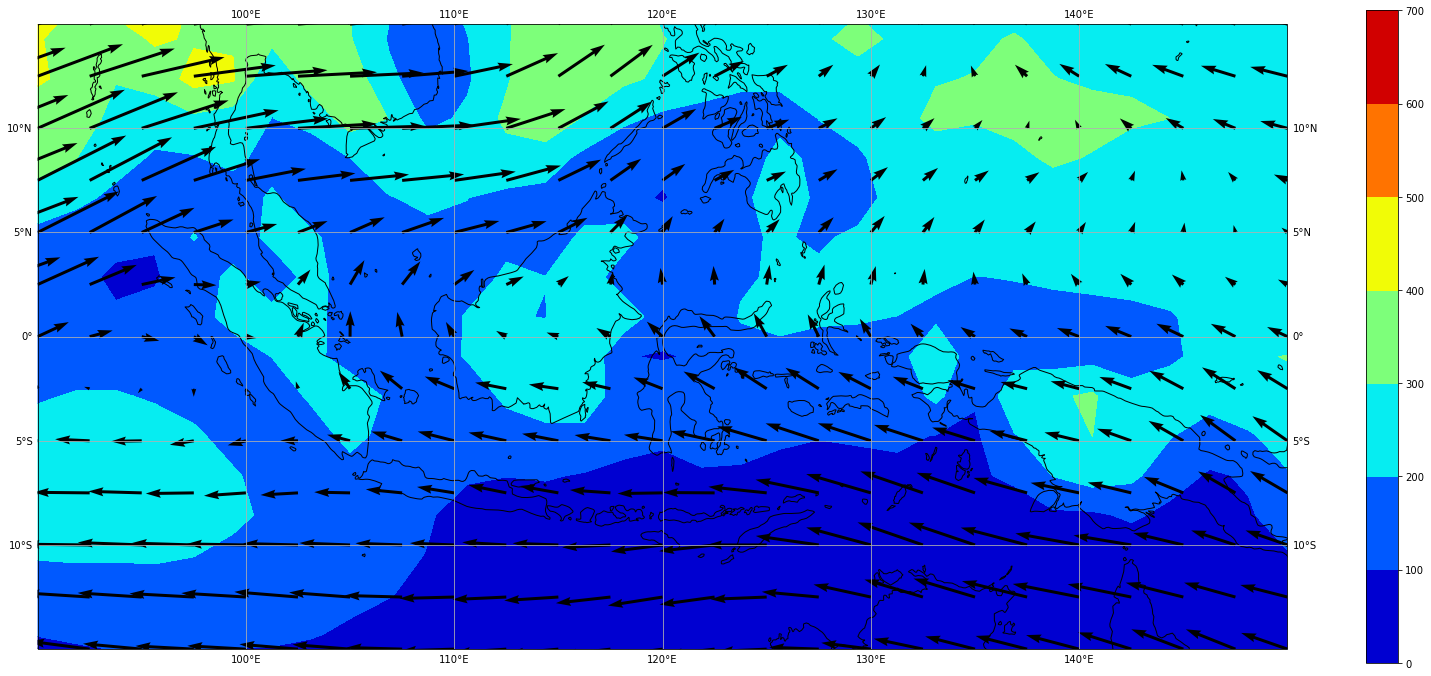

In [22]:
#figure dan axis 
fig = plt.figure(figsize=(28,12))
ax = plt.axes(projection=mproj)

#contourfill presipitasi
cf=ax.contourf(prec.lon,prec.lat,prclim.sel(season='JJA'),
               cmap=plt.cm.jet,
               transform=mproj)

#quiver untuk vektor angin
[xlon,ylat]=np.meshgrid(uwnd.lon,uwnd.lat)
qui=ax.quiver(xlon,ylat,uclim.sel(season='JJA'),vclim.sel(season='JJA'),
              transform=mproj,
              units='xy',
              scale=2.5)

ax.set_extent((90,150, -15, 15),crs=mproj)

#tambahkan colorbar
cb = plt.colorbar(cf)

#tambahkan beberapa fitur peta
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
#tambahkan grid line
ax.gridlines(draw_labels=True)

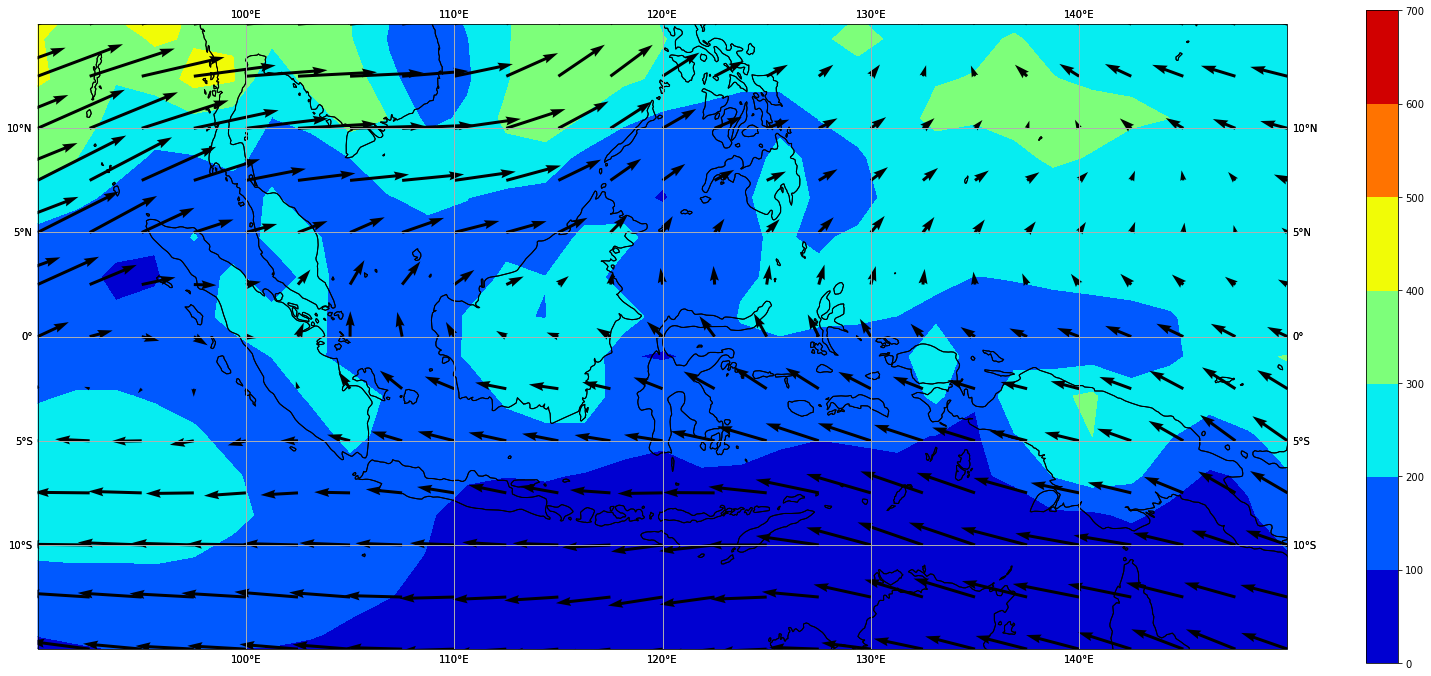

In [23]:
#tambahkan beberapa fitur peta
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
#tambahkan grid line
ax.gridlines(draw_labels=True)
fig

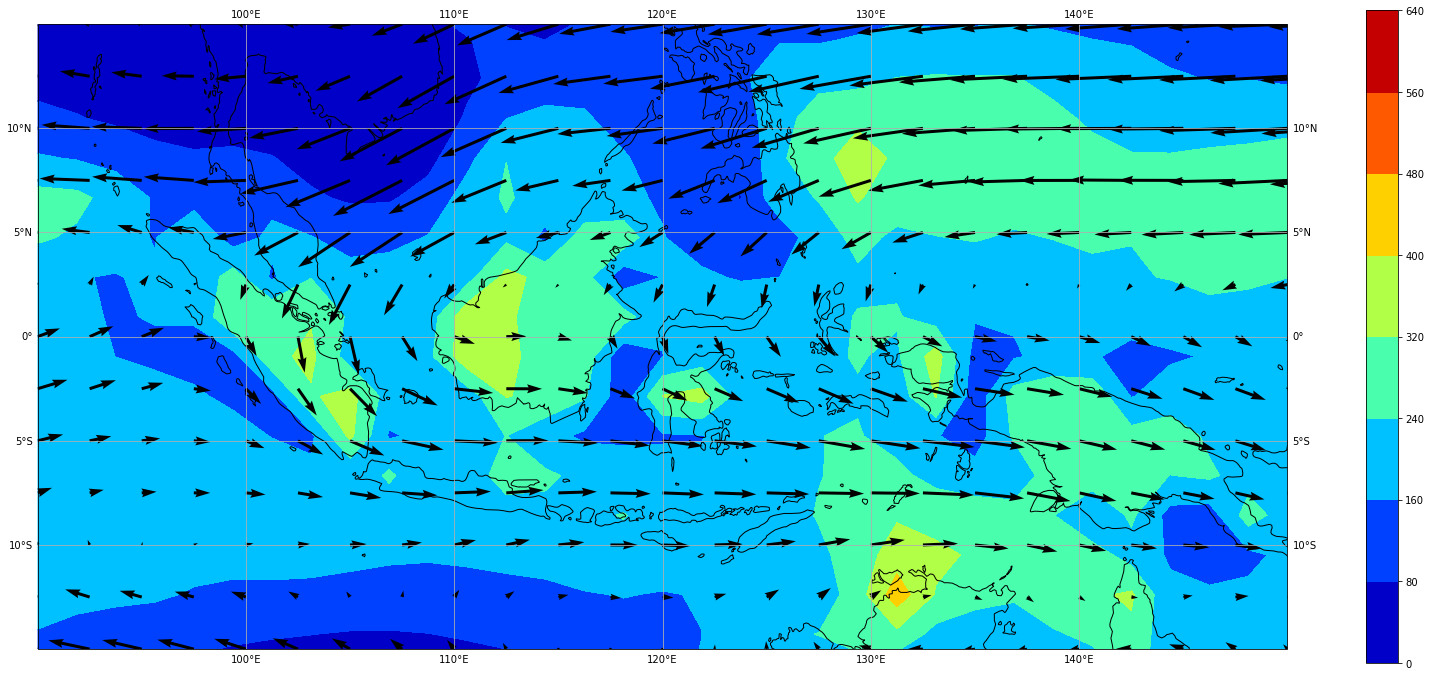

In [24]:
#figure dan axis 
fig = plt.figure(figsize=(28,12))
ax = plt.axes(projection=mproj)

#contourfill presipitasi
cf=ax.contourf(prec.lon,prec.lat,prclim.sel(season='DJF'),
               cmap=plt.cm.jet,
               transform=mproj)

#quiver untuk vektor angin
[xlon,ylat]=np.meshgrid(uwnd.lon,uwnd.lat)
qui=ax.quiver(xlon,ylat,uclim.sel(season='DJF'),vclim.sel(season='DJF'),
              transform=mproj,
              units='xy',
              scale=2.5)

ax.set_extent((90,150, -15, 15),crs=mproj)

#tambahkan colorbar
cb = plt.colorbar(cf)

#tambahkan beberapa fitur peta
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
#tambahkan grid line
ax.gridlines(draw_labels=True)

##  Transpor Kelembapan (<i>Vertically Integrated Moisture Transport </i>)

Transpor kelembapan dihitung dengan meniru algoritma pada fungsi `vint()` di [GrADS](http://cola.gmu.edu/grads/gadoc/gradfuncvint.html). GrADS menghitung *Vertically Integrated Moisture Transport* menggunakan persamaan:

$\frac{f}{g}\int_{P_0}^{P_1} Q \vec{V} dp$

dengan

   - $f$ faktor skala = 100
   - $g$ percepatan gravitasi= 9.8 $m.s^{-2}$
   - $Q$ kelembapan spesifik dalam $gr.kg^{-1}$
   - $\vec{V}$ vektor angin horizontal dalam $m.s^{-1}$
   - $P_0$ dan $P_1$ masing-masing adalah tekanan di permukaan dan tekanan di level atas integrasi =1000 mb dan 300 mb
   

In [25]:
#dataset 4: Kelembapan Spesifik
fQ=xr.open_dataset('Data/shum.mon.mean.nc')

In [26]:
fQ

<xarray.Dataset>
Dimensions:  (lat: 73, level: 8, lon: 144, time: 870)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 300.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-06-01
Data variables:
    shum     (time, level, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 22:28:55 1999: ncrcat shum.mon.mean.nc /Datase...
    title:          monthly mean shum from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

### Integrasi numerik (Trapezoid)
Integrasi numerik dilakukan menggunakan fungsi [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Fungsi ini memilikibebetrapa metode integrasi numerik:

>  Methods for Integrating Functions given function object.

     quad          -- General purpose integration.
     dblquad       -- General purpose double integration.
     tplquad       -- General purpose triple integration.
     fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n.
     quadrature    -- Integrate with given tolerance using Gaussian quadrature.
     romberg       -- Integrate func using Romberg integration.

> Methods for Integrating Functions given fixed samples.
   
     trapz         -- Use trapezoidal rule to compute integral from samples.
     cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
     simps         -- Use Simpson's rule to compute integral from samples.
     romb          -- Use Romberg Integration to compute integral from
                    (2**k + 1) evenly-spaced samples.
                    
Pada eksperimen ini kita akan menggunakan metode trapezoid `scipy.integrate.trapz`

In [27]:
from scipy import integrate

In [28]:
g=9.8;
Qu=fQ.shum/1000*fU.uwnd.sel(level=slice(1000,300)) ##level bawah 1000 sd 300 pakai operator slice. SLice bisa dipakai di lon lat 
Qv=fQ.shum/1000*fV.vwnd.sel(level=slice(1000,300))

In [29]:
Qu ###hasil kali Q dan u

<xarray.DataArray (time: 870, level: 8, lat: 73, lon: 144)>
array([[[[-4.53442044e-04, -4.53442044e-04, -4.55520931e-04, ...,
          -4.43041412e-04, -4.45120269e-04, -4.49281157e-04],
         [-3.50344024e-04, -3.58923542e-04, -3.64644686e-04, ...,
          -3.16655583e-04, -3.31755815e-04, -3.41764506e-04],
         [-2.93821358e-04, -3.33682139e-04, -3.70533089e-04, ...,
          -1.68720566e-04, -2.09249294e-04, -2.52800062e-04],
         ...,
         [ 7.24189042e-04,  1.09182450e-03,  1.47707865e-03, ...,
           0.00000000e+00,  1.98351918e-04,  4.50206833e-04],
         [-1.05751061e-03, -8.83749977e-04, -6.38308062e-04, ...,
          -1.60680350e-03, -1.43501291e-03, -1.22922112e-03],
         [-9.94810136e-04, -8.95334117e-04, -8.28999968e-04, ...,
          -1.16062025e-03, -1.09428598e-03, -1.06114428e-03]],

        [[-7.19039876e-04, -7.09410291e-04, -6.96567586e-04, ...,
          -7.41507276e-04, -7.35090813e-04, -7.28669460e-04],
         [-4.77362250e-04, -4.68520331e-04, -4.59681789e-04, ...,
          -4.92840540e-04, -4.90621780e-04, -4.81783209e-04],
         [-4.86719684e-04, -5.21560549e-04, -5.42879978e-04, ...,
          -3.60498001e-04, -4.07001062e-04, -4.50801628e-04],
         ...,
         [ 6.42403611e-04,  9.10809089e-04,  1.19207497e-03, ...,
           5.07508157e-05,  1.86528792e-04,  4.18932847e-04],
         [-6.83535531e-04, -5.14282729e-04, -3.44265922e-04, ...,
          -1.07009371e-03, -9.31924966e-04, -7.93796265e-04],
         [-6.99125056e-04, -6.45374588e-04, -6.18458376e-04, ...,
          -8.33583239e-04, -7.79832772e-04, -7.52916501e-04]],

        [[-7.43041281e-04, -7.19822128e-04, -6.96603034e-04, ...,
          -8.08830722e-04, -7.89485406e-04, -7.66260375e-04],
         [-4.51441243e-04, -4.18198731e-04, -3.84177518e-04, ...,
          -5.50680154e-04, -5.16517030e-04, -4.86453006e-04],
         [-1.14620612e-04, -5.89602496e-05,  0.00000000e+00, ...,
          -2.22310380e-04, -1.96003632e-04, -1.61604039e-04],
         ...,
         [ 3.66408232e-04,  5.94999816e-04,  8.35711020e-04, ...,
          -7.97370303e-05,  4.18289274e-05,  1.97271918e-04],
         [-3.36620462e-04, -2.25113690e-04, -1.13006907e-04, ...,
          -6.21597050e-04, -5.34012332e-04, -4.46992897e-04],
         [-5.33999933e-04, -5.12651692e-04, -4.91270795e-04, ...,
          -6.19458151e-04, -5.76729071e-04, -5.55348175e-04]],

        ...,

        [[-1.04960840e-04, -8.69205760e-05, -6.88803193e-05, ...,
          -1.56621696e-04, -1.39401003e-04, -1.22181547e-04],
         [ 1.91395753e-04,  2.00674869e-04,  2.09375197e-04, ...,
           1.61236196e-04,  1.72256085e-04,  1.81536088e-04],
         [ 4.00007091e-04,  4.22221725e-04,  4.49446758e-04, ...,
           3.44227417e-04,  3.60725302e-04,  3.84174986e-04],
         ...,
         [ 2.40470370e-04,  3.18240025e-04,  4.01721831e-04, ...,
           8.36994877e-05,  1.19900265e-04,  1.72500600e-04],
         [ 4.46587692e-05,  6.51982846e-05,  8.54988102e-05, ...,
          -5.28112696e-06,  1.10402916e-05,  2.62789126e-05],
         [ 8.25054940e-06,  1.15487555e-05,  1.64985813e-05, ...,
          -3.30072339e-06,  1.64910284e-06,  4.94982623e-06]],

        [[-1.27486956e-05, -6.99932843e-06, -1.24996188e-06, ...,
          -2.99971762e-05, -2.39979709e-05, -1.84984438e-05],
         [ 8.78290666e-05,  9.08886504e-05,  9.37680816e-05, ...,
           7.77500973e-05,  8.13498700e-05,  8.47692063e-05],
         [ 1.76203990e-04,  1.84799268e-04,  1.92934487e-04, ...,
           1.66258804e-04,  1.67208913e-04,  1.76203990e-04],
         ...,
         [ 5.37562337e-05,  7.31558466e-05,  9.84019134e-05, ...,
           2.47799526e-05,  2.90988519e-05,  3.77950928e-05],
         [ 1.32300447e-05,  1.45196582e-05,  1.51796121e-05, ...,
           9.80033383e-06,  1.08001132e-05,  1.23898690e-05],
         [ 1.60007323e-06,  5.99989335e-07, -8.00189241e-07, ...,
           5.00011447e-06,  3.80013580e-06,  2.80005179e-06]],

      

In [30]:
#trapezoid
BQu=-1*100./g*integrate.trapz(Qu,x=Qu.level,axis=1)  #   yg trapezoid int dari 300 ke 1000 maka dikali -1
BQv=-1*100./g*integrate.trapz(Qv,x=Qv.level,axis=1)

In [31]:
type(BQu)

numpy.ndarray

In [32]:
#combine ke DataArray Qu dan Qv
Qu['BQu']=(('time','lat','lon'),BQu)  ###insert data array kita BQu ke data lama Qu
Qv['BQv']=(('time','lat','lon'),BQv)

In [33]:
Qu

<xarray.DataArray (time: 870, level: 8, lat: 73, lon: 144)>
array([[[[-4.53442044e-04, -4.53442044e-04, -4.55520931e-04, ...,
          -4.43041412e-04, -4.45120269e-04, -4.49281157e-04],
         [-3.50344024e-04, -3.58923542e-04, -3.64644686e-04, ...,
          -3.16655583e-04, -3.31755815e-04, -3.41764506e-04],
         [-2.93821358e-04, -3.33682139e-04, -3.70533089e-04, ...,
          -1.68720566e-04, -2.09249294e-04, -2.52800062e-04],
         ...,
         [ 7.24189042e-04,  1.09182450e-03,  1.47707865e-03, ...,
           0.00000000e+00,  1.98351918e-04,  4.50206833e-04],
         [-1.05751061e-03, -8.83749977e-04, -6.38308062e-04, ...,
          -1.60680350e-03, -1.43501291e-03, -1.22922112e-03],
         [-9.94810136e-04, -8.95334117e-04, -8.28999968e-04, ...,
          -1.16062025e-03, -1.09428598e-03, -1.06114428e-03]],

        [[-7.19039876e-04, -7.09410291e-04, -6.96567586e-04, ...,
          -7.41507276e-04, -7.35090813e-04, -7.28669460e-04],
         [-4.77362250e-04, -4.68520331e-04, -4.59681789e-04, ...,
          -4.92840540e-04, -4.90621780e-04, -4.81783209e-04],
         [-4.86719684e-04, -5.21560549e-04, -5.42879978e-04, ...,
          -3.60498001e-04, -4.07001062e-04, -4.50801628e-04],
         ...,
         [ 6.42403611e-04,  9.10809089e-04,  1.19207497e-03, ...,
           5.07508157e-05,  1.86528792e-04,  4.18932847e-04],
         [-6.83535531e-04, -5.14282729e-04, -3.44265922e-04, ...,
          -1.07009371e-03, -9.31924966e-04, -7.93796265e-04],
         [-6.99125056e-04, -6.45374588e-04, -6.18458376e-04, ...,
          -8.33583239e-04, -7.79832772e-04, -7.52916501e-04]],

        [[-7.43041281e-04, -7.19822128e-04, -6.96603034e-04, ...,
          -8.08830722e-04, -7.89485406e-04, -7.66260375e-04],
         [-4.51441243e-04, -4.18198731e-04, -3.84177518e-04, ...,
          -5.50680154e-04, -5.16517030e-04, -4.86453006e-04],
         [-1.14620612e-04, -5.89602496e-05,  0.00000000e+00, ...,
          -2.22310380e-04, -1.96003632e-04, -1.61604039e-04],
         ...,
         [ 3.66408232e-04,  5.94999816e-04,  8.35711020e-04, ...,
          -7.97370303e-05,  4.18289274e-05,  1.97271918e-04],
         [-3.36620462e-04, -2.25113690e-04, -1.13006907e-04, ...,
          -6.21597050e-04, -5.34012332e-04, -4.46992897e-04],
         [-5.33999933e-04, -5.12651692e-04, -4.91270795e-04, ...,
          -6.19458151e-04, -5.76729071e-04, -5.55348175e-04]],

        ...,

        [[-1.04960840e-04, -8.69205760e-05, -6.88803193e-05, ...,
          -1.56621696e-04, -1.39401003e-04, -1.22181547e-04],
         [ 1.91395753e-04,  2.00674869e-04,  2.09375197e-04, ...,
           1.61236196e-04,  1.72256085e-04,  1.81536088e-04],
         [ 4.00007091e-04,  4.22221725e-04,  4.49446758e-04, ...,
           3.44227417e-04,  3.60725302e-04,  3.84174986e-04],
         ...,
         [ 2.40470370e-04,  3.18240025e-04,  4.01721831e-04, ...,
           8.36994877e-05,  1.19900265e-04,  1.72500600e-04],
         [ 4.46587692e-05,  6.51982846e-05,  8.54988102e-05, ...,
          -5.28112696e-06,  1.10402916e-05,  2.62789126e-05],
         [ 8.25054940e-06,  1.15487555e-05,  1.64985813e-05, ...,
          -3.30072339e-06,  1.64910284e-06,  4.94982623e-06]],

        [[-1.27486956e-05, -6.99932843e-06, -1.24996188e-06, ...,
          -2.99971762e-05, -2.39979709e-05, -1.84984438e-05],
         [ 8.78290666e-05,  9.08886504e-05,  9.37680816e-05, ...,
           7.77500973e-05,  8.13498700e-05,  8.47692063e-05],
         [ 1.76203990e-04,  1.84799268e-04,  1.92934487e-04, ...,
           1.66258804e-04,  1.67208913e-04,  1.76203990e-04],
         ...,
         [ 5.37562337e-05,  7.31558466e-05,  9.84019134e-05, ...,
           2.47799526e-05,  2.90988519e-05,  3.77950928e-05],
         [ 1.32300447e-05,  1.45196582e-05,  1.51796121e-05, ...,
           9.80033383e-06,  1.08001132e-05,  1.23898690e-05],
         [ 1.60007323e-06,  5.99989335e-07, -8.00189241e-07, ...,
           5.00011447e-06,  3.80013580e-06,  2.80005179e-06]],

      

### Hitung klimatologi transpor kelembapan

In [34]:
BQu_clim=Qu.BQu.groupby('time.season').mean(dim='time')  ###grup berdasarkan time dgn informasi waktu season
BQv_clim=Qv.BQv.groupby('time.season').mean(dim='time')

/usr/lib/python3/dist-packages/xarray/core/common.py:663: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  return self._groupby_cls(


In [35]:
BQu_clim

<xarray.DataArray 'BQu' (season: 4, lat: 73, lon: 144)>
array([[[-5.8874545 , -5.7993627 , -5.7008014 , ..., -6.082589  ,
         -6.0294256 , -5.963584  ],
        [-3.5625527 , -3.4718711 , -3.376414  , ..., -3.800136  ,
         -3.7270038 , -3.6483111 ],
        [-1.336825  , -1.379587  , -1.3994591 , ..., -1.0806094 ,
         -1.1859499 , -1.2719735 ],
        ...,
        [-4.5687666 , -3.8195534 , -2.854087  , ..., -5.67547   ,
         -5.461535  , -5.105577  ],
        [-3.3407676 , -2.499194  , -1.6251615 , ..., -5.6496396 ,
         -4.9149513 , -4.1470876 ],
        [ 2.4995167 ,  3.1656415 ,  3.8286786 , ...,  0.47361937,
          1.1521488 ,  1.8261533 ]],

       [[ 5.8914924 ,  5.9594393 ,  6.017388  , ...,  5.6153646 ,
          5.716031  ,  5.807222  ],
        [ 8.358157  ,  8.388228  ,  8.420189  , ...,  8.295648  ,
          8.312612  ,  8.331467  ],
        [11.6927    , 11.570864  , 11.5138035 , ..., 12.537408  ,
         12.179849  , 11.899164  ],
        ...,
        [-0.81095016, -1.0368974 , -1.1956888 , ..., -0.26222774,
         -0.3917109 , -0.58167726],
        [-0.5110796 , -0.4899586 , -0.46172765, ..., -0.5428918 ,
         -0.53568554, -0.5255314 ],
        [ 0.15041627,  0.21470092,  0.27859217, ..., -0.04371754,
          0.02104083,  0.08583073]],

       [[-5.13249   , -5.1705875 , -5.198097  , ..., -4.961964  ,
         -5.0287724 , -5.085866  ],
        [-2.6673505 , -2.7339063 , -2.8015637 , ..., -2.4668298 ,
         -2.5336566 , -2.5995665 ],
        [ 0.16223684, -0.04404121, -0.23965462, ...,  0.84152865,
          0.60588026,  0.37903696],
        ...,
        [-0.67313606, -0.8298509 , -0.9460491 , ..., -0.32043767,
         -0.40072152, -0.5195199 ],
        [-1.0214647 , -0.9666014 , -0.90231615, ..., -1.1407232 ,
         -1.1077224 , -1.0675367 ],
        [ 0.14079297,  0.21721596,  0.2932003 , ..., -0.08949058,
         -0.01277406,  0.06411794]],

       [[-4.921243  , -4.8220425 , -4.712704  , ..., -5.16318   ,
         -5.0914907 , -5.010727  ],
        [-2.4182112 , -2.319934  , -2.2113957 , ..., -2.6498346 ,
         -2.5822284 , -2.5066974 ],
        [ 0.88463676,  0.8426009 ,  0.8546819 , ...,  1.3418816 ,
          1.1366959 ,  0.98328054],
        ...,
        [-3.655066  , -3.8105276 , -3.8011522 , ..., -2.7855835 ,
         -3.074405  , -3.3869503 ],
        [-2.4763677 , -2.2344992 , -1.9756625 , ..., -3.1177745 ,
         -2.9159563 , -2.7029376 ],
        [ 0.8925863 ,  1.2311621 ,  1.5675774 , ..., -0.1308797 ,
          0.2108627 ,  0.5525051 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

### Gambar dengan Cartopy


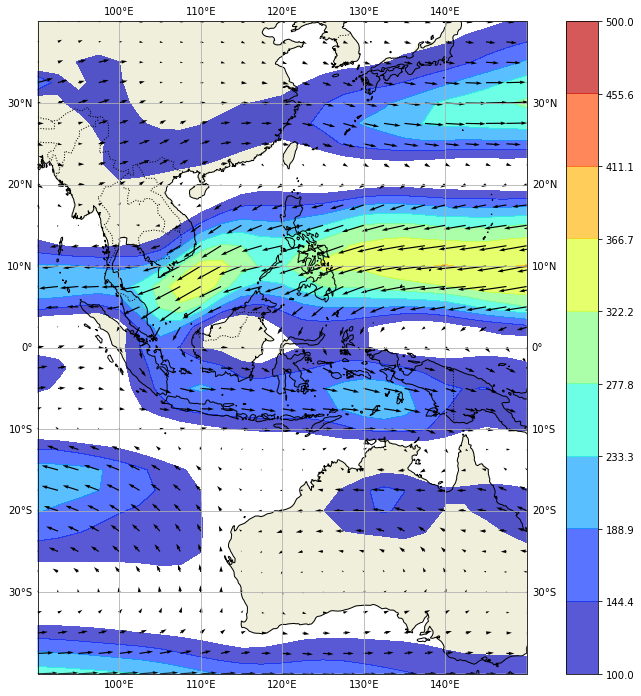

In [36]:
#projection
mproj=ccrs.PlateCarree()
#figure dan axes 
fig = plt.figure(1, figsize=(14, 12))
ax = plt.axes(projection=mproj)

#contourfill magnitude
magBQ=np.sqrt(BQu_clim**2+BQv_clim**2)
lvl=np.linspace(100,500,10)
cf=ax.contourf(magBQ.lon, magBQ.lat,magBQ.sel(season='DJF'), 
               #cmap=plt.cm.bwr,
               cmap=plt.cm.jet,
               transform=mproj,
               levels=lvl,
               #zorder=2,      ####bikin transparan
               alpha=0.65,)
cb = plt.colorbar(cf, orientation='vertical')

#vector
qui=ax.quiver(xlon,ylat,BQu_clim.sel(season='DJF'),BQv_clim.sel(season='DJF'),
              units='xy',
              scale=100,
              transform=mproj)

#tambahkan map feature
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent((90,150, -40, 40),crs=mproj)
#grid line
ax.gridlines(draw_labels=True)


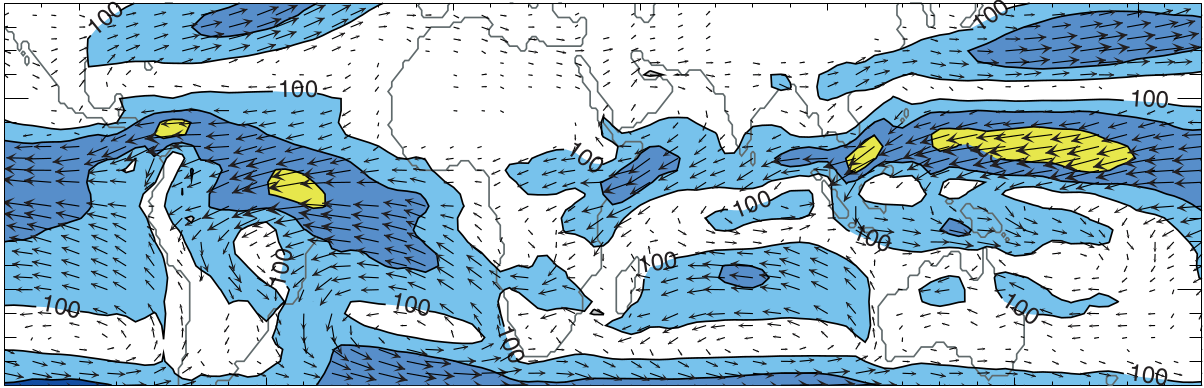

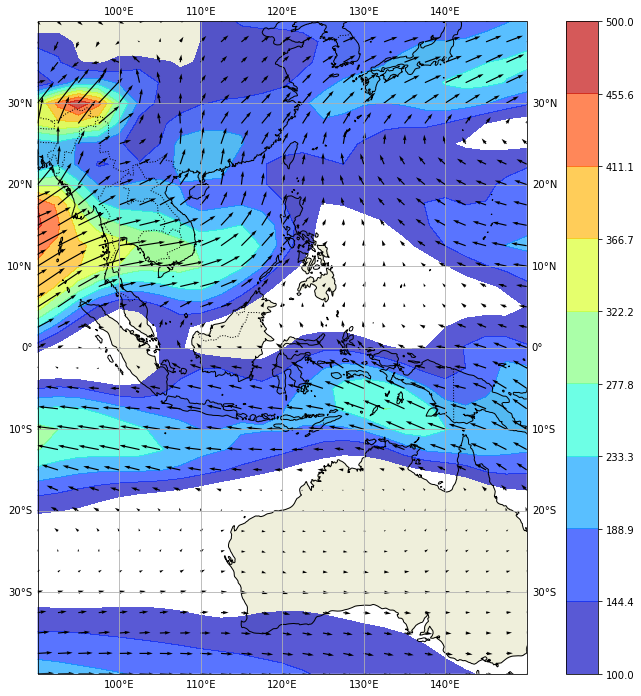

In [37]:
#projection
mproj=ccrs.PlateCarree()
#figure dan axes 
fig = plt.figure(1, figsize=(14, 12))
ax = plt.axes(projection=mproj)

#contourfill magnitude
magBQ=np.sqrt(BQu_clim**2+BQv_clim**2)
lvl=np.linspace(100,500,10)
cf=ax.contourf(magBQ.lon, magBQ.lat,magBQ.sel(season='JJA'), 
               #cmap=plt.cm.bwr,
               cmap=plt.cm.jet,
               transform=mproj,
               levels=lvl,
               #zorder=2,      ####bikin transparan
               alpha=0.65,)
cb = plt.colorbar(cf, orientation='vertical')

#vector
qui=ax.quiver(xlon,ylat,BQu_clim.sel(season='JJA'),BQv_clim.sel(season='JJA'),
              units='xy',
              scale=100,
              transform=mproj)

#tambahkan map feature
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent((90,150, -40, 40),crs=mproj)
#grid line
ax.gridlines(draw_labels=True)


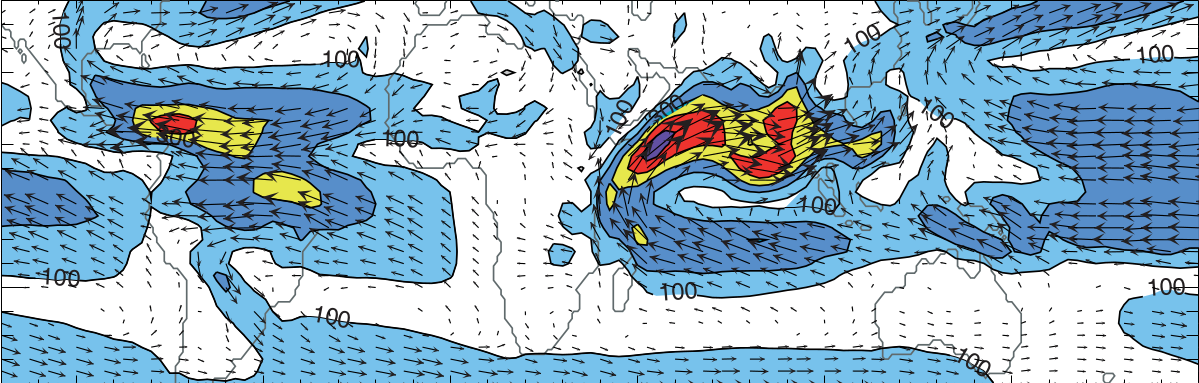

In [38]:
#klimatologi
uclim2=uwnd.groupby('time.month').mean(dim='time')
vclim2=vwnd.groupby('time.month').mean(dim='time')
prclim2=prec.groupby('time.month').mean(dim='time')

BQu_clim2=Qu.BQu.groupby('time.month').mean(dim='time')  ###grup berdasarkan time dgn informasi waktu season
BQv_clim2=Qv.BQv.groupby('time.month').mean(dim='time')

In [39]:
BQu_clim2

<xarray.DataArray 'BQu' (month: 12, lat: 73, lon: 144)>
array([[[-5.9308496 , -5.8316097 , -5.722201  , ..., -6.1604457 ,
         -6.095784  , -6.0188084 ],
        [-3.8312728 , -3.7054226 , -3.57624   , ..., -4.1688757 ,
         -4.0621424 , -3.9498384 ],
        [-1.7868646 , -1.7860304 , -1.762748  , ..., -1.6543458 ,
         -1.7193831 , -1.7653298 ],
        ...,
        [-5.223913  , -4.049999  , -2.652372  , ..., -7.3377843 ,
         -6.850442  , -6.155014  ],
        [-3.2991705 , -2.2309275 , -1.1261508 , ..., -6.2346277 ,
         -5.3001714 , -4.3231683 ],
        [ 3.5698547 ,  4.3430476 ,  5.1082306 , ...,  1.2147646 ,
          2.0038443 ,  2.788231  ]],

       [[-4.828614  , -4.7183976 , -4.600218  , ..., -5.0987554 ,
         -5.018952  , -4.927565  ],
        [-2.6893983 , -2.6147835 , -2.5344484 , ..., -2.8838296 ,
         -2.8246446 , -2.760774  ],
        [-0.56578255, -0.59836316, -0.6069547 , ..., -0.34900358,
         -0.44143662, -0.5122016 ],
        ...,
        [-4.5952973 , -4.6453333 , -4.4745264 , ..., -3.7013357 ,
         -4.0497046 , -4.373354  ],
        [-5.055586  , -4.6227736 , -4.160904  , ..., -6.202872  ,
         -5.843383  , -5.463049  ],
        [-1.0551577 , -0.6206177 , -0.18184383, ..., -2.3484113 ,
         -1.9201316 , -1.4893091 ]],

       [[-5.3507    , -5.3399553 , -5.319369  , ..., -5.3200574 ,
         -5.340971  , -5.351446  ],
        [-3.3036032 , -3.2973115 , -3.287446  , ..., -3.2981071 ,
         -3.3048985 , -3.3063622 ],
        [-1.3740835 , -1.4935231 , -1.5946126 , ..., -0.9377079 ,
         -1.0948873 , -1.2403926 ],
        ...,
        [-0.8067699 , -0.9952526 , -1.1312442 , ..., -0.41809103,
         -0.5025984 , -0.63149405],
        [-1.4151189 , -1.3248218 , -1.2231152 , ..., -1.630146  ,
         -1.5666816 , -1.4947559 ],
        [ 0.01890017,  0.12774894,  0.23645286, ..., -0.30715102,
         -0.19894116, -0.08992212]],

       ...,

       [[-4.169435  , -4.166343  , -4.1529274 , ..., -4.1366115 ,
         -4.155543  , -4.166403  ],
        [-1.7859321 , -1.7818389 , -1.7696097 , ..., -1.7690771 ,
         -1.7790723 , -1.787401  ],
        [ 1.5329517 ,  1.4685677 ,  1.4419767 , ...,  1.9887354 ,
          1.7940867 ,  1.6416838 ],
        ...,
        [-2.3773584 , -2.7489157 , -2.950185  , ..., -1.1380011 ,
         -1.480315  , -1.9169219 ],
        [-1.6099299 , -1.5015235 , -1.3776064 , ..., -1.8774809 ,
         -1.7950507 , -1.7067351 ],
        [ 0.5323604 ,  0.77978045,  1.0254818 , ..., -0.21419868,
          0.03511675,  0.2842725 ]],

       [[-6.3798165 , -6.2765284 , -6.1624265 , ..., -6.6147127 ,
         -6.5478954 , -6.46892   ],
        [-4.427667  , -4.3249936 , -4.2104707 , ..., -4.6719785 ,
         -4.602152  , -4.5219307 ],
        [-2.0166612 , -2.0664666 , -2.0718586 , ..., -1.6293513 ,
         -1.7963761 , -1.9261358 ],
        ...,
        [-7.6385455 , -7.5066996 , -7.125145  , ..., -6.902026  ,
         -7.2712927 , -7.5436063 ],
        [-5.362326  , -4.760708  , -4.12683   , ..., -6.993227  ,
         -6.475846  , -5.933448  ],
        [ 2.005251  ,  2.696902  ,  3.3841505 , ..., -0.08747701,
          0.61143935,  1.3099766 ]],

       [[-6.917002  , -6.8626475 , -6.794968  , ..., -7.0011435 ,
         -6.986647  , -6.958     ],
        [-4.1753807 , -4.1040697 , -4.0274725 , ..., -4.3553066 ,
         -4.3021007 , -4.242456  ],
        [-1.6622869 , -1.7595736 , -1.8346353 , ..., -1.2406716 ,
         -1.3999624 , -1.5420886 ],
        ...,
        [-3.8776207 , -2.7486582 , -1.415659  , ..., -5.991624  ,
         -5.484778  , -4.783955  ],
        [-1.6443092 , -0.61811197,  0.4398583 , ..., -4.4956093 ,
         -3.5830514 , -2.6343262 ],
        [ 5.018358  ,  5.8107266 ,  6.5975814 , ...,  2.583406  ,
          3.4035757 ,  4.2122245 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352

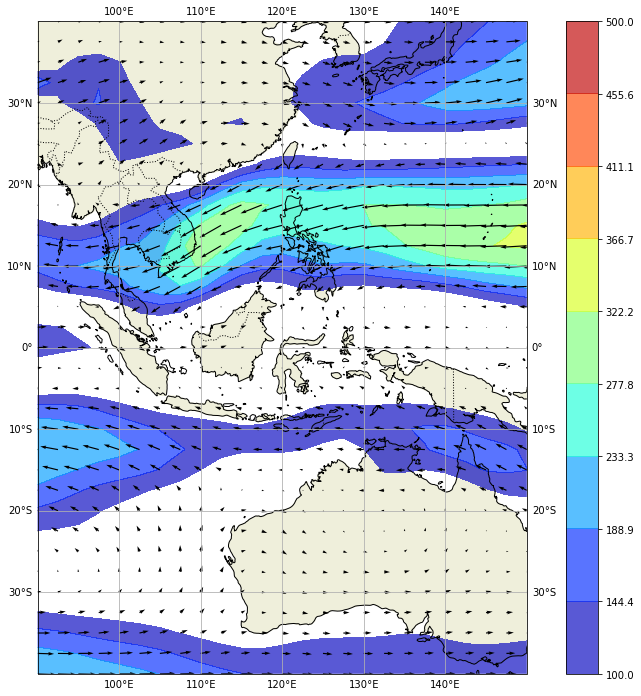

In [40]:
########BULANAN>>>>MONTH#########

#projection
mproj=ccrs.PlateCarree()
#figure dan axes 
fig = plt.figure(1, figsize=(14, 12))
ax = plt.axes(projection=mproj)

#contourfill magnitude
magBQ=np.sqrt(BQu_clim2**2+BQv_clim2**2)
lvl=np.linspace(100,500,10)
cf=ax.contourf(magBQ.lon, magBQ.lat,magBQ.sel(month=11), 
               #cmap=plt.cm.bwr,
               cmap=plt.cm.jet,
               transform=mproj,
               levels=lvl,
               #zorder=2,      ####bikin transparan
               alpha=0.65,)
cb = plt.colorbar(cf, orientation='vertical')

#vector
qui=ax.quiver(xlon,ylat,BQu_clim2.sel(month=11),BQv_clim2.sel(month=11),
              units='xy',
              scale=100,
              transform=mproj)

#tambahkan map feature
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent((90,150, -40, 40),crs=mproj)
#grid line
ax.gridlines(draw_labels=True)

In [41]:
Qu.BQu

<xarray.DataArray 'BQu' (time: 870, lat: 73, lon: 144)>
array([[[-2.45152402e+00, -2.31744385e+00, -2.17809939e+00, ...,
         -2.82354927e+00, -2.70300889e+00, -2.58125138e+00],
        [-2.35191703e-01, -1.26995996e-01, -1.33909602e-02, ...,
         -5.77504992e-01, -4.63191569e-01, -3.49102855e-01],
        [ 1.68297791e+00,  1.84108829e+00,  2.01150250e+00, ...,
          1.32917047e+00,  1.43246746e+00,  1.55252612e+00],
        ...,
        [ 2.67548251e+00,  3.65512514e+00,  4.70294094e+00, ...,
          5.65544009e-01,  1.11699617e+00,  1.87675226e+00],
        [-1.14569819e+00, -6.65641546e-01, -1.63027927e-01, ...,
         -2.37770510e+00, -1.97728658e+00, -1.56124401e+00],
        [-1.99489915e+00, -1.87201262e+00, -1.77540839e+00, ...,
         -2.32502365e+00, -2.18316674e+00, -2.10053492e+00]],

       [[-2.51100397e+00, -2.33365750e+00, -2.14046764e+00, ...,
         -3.04001141e+00, -2.87350559e+00, -2.69548845e+00],
        [ 4.27031374e+00,  4.48903608e+00,  4.70696831e+00, ...,
          3.47924781e+00,  3.75435472e+00,  4.01115036e+00],
        [ 9.70984077e+00,  1.01742191e+01,  1.06467638e+01, ...,
          8.32460880e+00,  8.77276516e+00,  9.23898792e+00],
        ...,
        [-5.04840469e+00, -4.72947979e+00, -4.31757689e+00, ...,
         -5.43376970e+00, -5.41220856e+00, -5.28261709e+00],
        [-7.20331860e+00, -6.88222456e+00, -6.55756044e+00, ...,
         -8.05037212e+00, -7.78658724e+00, -7.50872564e+00],
        [-3.00582170e+00, -2.76578236e+00, -2.51804376e+00, ...,
         -3.66289425e+00, -3.45628381e+00, -3.23930383e+00]],

       [[-1.00231895e+01, -9.88496971e+00, -9.74216270e+00, ...,
         -1.03325901e+01, -1.02492695e+01, -1.01575689e+01],
        [-6.95591545e+00, -6.67540073e+00, -6.39994669e+00, ...,
         -7.76916742e+00, -7.51647091e+00, -7.24893856e+00],
        [-2.54887247e+00, -2.42840528e+00, -2.27202392e+00, ...,
         -2.75417805e+00, -2.70105815e+00, -2.64961672e+00],
        ...,
        [-1.50715172e+00, -1.61817014e+00, -1.72421455e+00, ...,
         -8.95745814e-01, -1.07294500e+00, -1.33701491e+00],
        [-2.56620669e+00, -2.48285961e+00, -2.38004375e+00, ...,
         -2.73195004e+00, -2.69515991e+00, -2.62910819e+00],
        [-2.47202516e+00, -2.40456891e+00, -2.33103299e+00, ...,
         -2.64302969e+00, -2.59329081e+00, -2.53359342e+00]],

       ...,

       [[ 1.32905293e+01,  1.31139536e+01,  1.29286451e+01, ...,
          1.36278286e+01,  1.35403910e+01,  1.34307861e+01],
        [ 1.03216915e+01,  9.99944115e+00,  9.69542027e+00, ...,
          1.13416471e+01,  1.09989738e+01,  1.06594086e+01],
        [ 9.99472237e+00,  9.47435284e+00,  8.99882984e+00, ...,
          1.19134693e+01,  1.12080498e+01,  1.05860281e+01],
        ...,
        [-1.01186407e+00, -9.88013983e-01, -8.30042422e-01, ...,
         -5.48594058e-01, -7.10101962e-01, -9.04720426e-01],
        [-1.30661047e+00, -1.10647905e+00, -8.84372950e-01, ...,
         -1.80000162e+00, -1.65766442e+00, -1.48864853e+00],
        [ 1.39732289e+00,  1.55370486e+00,  1.70931268e+00, ...,
          9.09034908e-01,  1.07302928e+00,  1.23637021e+00]],

       [[ 1.60003109e+01,  1.59615545e+01,  1.59174461e+01, ...,
          1.59008684e+01,  1.59742517e+01,  1.60138893e+01],
        [-1.36779583e+00, -1.36393273e+00, -1.35881615e+00, ...,
         -1.19683659e+00, -1.25815737e+00, -1.31756508e+00],
        [-1.48416691e+01, -1.53526688e+01, -1.57919321e+01, ...,
         -1.27994833e+01, -1.35399780e+01, -1.42152185e+01],
        ...,
        [-9.99095023e-01, -1.07937181e+00, -1.04007363e+00, ...,
         -4.41138297e-01, -6.18433833e-01, -8.19695592e-01],
        [-6.50336564e-01, -5.27298808e-01, -4.02095854e-01, ...,
         -9.24142241e-01, -8.48750114e-01, -7.55476654e-01],
        [ 9.06061351e-01,  9.96338904e-01,  1.08579350e+00, ...,
          6.21811330e-01,  7.17547178e-01,  8.12236845e-01]],

       [[ 7.38613510e+01,  7.15254898e+01,  6.91093140e+01, ...,
          7

In [42]:
Qu.BQu.sel(time=slice('1998-1-1','1998-12-1'))

<xarray.DataArray 'BQu' (time: 12, lat: 73, lon: 144)>
array([[[-13.506796  , -13.503419  , -13.49052   , ..., -13.32978   ,
         -13.409462  , -13.463109  ],
        [-11.764331  , -11.533437  , -11.305151  , ..., -12.404909  ,
         -12.191764  , -11.979634  ],
        [ -8.300604  ,  -8.31003   ,  -8.265132  , ...,  -8.293095  ,
          -8.307684  ,  -8.308229  ],
        ...,
        [-11.684202  , -10.955074  ,  -9.994122  , ..., -12.488918  ,
         -12.372044  , -12.137568  ],
        [  3.4875576 ,   4.779504  ,   6.0500307 , ...,  -0.25539887,
           0.97429144,   2.2338405 ],
        [ 17.545248  ,  18.49771   ,  19.418472  , ...,  14.513952  ,
          15.552092  ,  16.5815    ]],

       [[ -1.975014  ,  -2.1961155 ,  -2.415137  , ...,  -1.2797282 ,
          -1.5203779 ,  -1.7466439 ],
        [  1.1638834 ,   1.2181622 ,   1.2584993 , ...,   0.9266171 ,
           1.0169125 ,   1.0966161 ],
        [  3.9759254 ,   4.3534565 ,   4.727305  , ...,   2.8374562 ,
           3.211333  ,   3.592391  ],
        ...,
        [ -6.171597  ,  -6.4262657 ,  -6.3143463 , ...,  -4.404138  ,
          -5.0279617 ,  -5.6457896 ],
        [ -3.0414398 ,  -2.4967778 ,  -1.9333242 , ...,  -4.6014853 ,
          -4.086593  ,  -3.564114  ],
        [  2.2047575 ,   2.6574628 ,   3.1092181 , ...,   0.8129749 ,
           1.2850517 ,   1.7448891 ]],

       [[ -1.8580661 ,  -1.6779077 ,  -1.5009304 , ...,  -2.3889756 ,
          -2.2180598 ,  -2.0410259 ],
        [ -4.888596  ,  -4.3938403 ,  -3.9043994 , ...,  -6.294174  ,
          -5.8297873 ,  -5.3667126 ],
        [ -7.047335  ,  -6.5485682 ,  -5.980686  , ...,  -8.148808  ,
          -7.8479557 ,  -7.481207  ],
        ...,
        [ -1.2169932 ,  -1.6098682 ,  -1.8890803 , ...,  -0.4227278 ,
          -0.6301546 ,  -0.8821062 ],
        [ -0.94132626,  -0.7064362 ,  -0.44139853, ...,  -1.493592  ,
          -1.3355852 ,  -1.1528671 ],
        [  2.1580496 ,   2.2931724 ,   2.4211102 , ...,   1.7361358 ,
           1.8808013 ,   2.0215485 ]],

       ...,

       [[ -4.487808  ,  -3.831005  ,  -3.1676698 , ...,  -6.412133  ,
          -5.7851806 ,  -5.131856  ],
        [ -6.170291  ,  -5.374158  ,  -4.5871234 , ...,  -8.503946  ,
          -7.7313924 ,  -6.9367604 ],
        [ -5.841796  ,  -5.370879  ,  -4.8548245 , ...,  -6.886324  ,
          -6.6019855 ,  -6.2431536 ],
        ...,
        [ -2.4427638 ,  -2.7912767 ,  -3.016067  , ...,  -1.036585  ,
          -1.512489  ,  -1.9981436 ],
        [ -2.1821296 ,  -2.123981  ,  -2.031704  , ...,  -2.2375317 ,
          -2.2387145 ,  -2.2257075 ],
        [ -0.6005688 ,  -0.43385053,  -0.26515883, ...,  -1.0990679 ,
          -0.93538076,  -0.7690973 ]],

       [[ -6.4337606 ,  -5.9346538 ,  -5.4092803 , ...,  -7.868502  ,
          -7.4104624 ,  -6.931069  ],
        [ -7.208422  ,  -6.5500875 ,  -5.87454   , ...,  -9.131762  ,
          -8.507973  ,  -7.867263  ],
        [ -9.43056   ,  -9.0242    ,  -8.525664  , ..., -10.134369  ,
          -9.983423  ,  -9.742937  ],
        ...,
        [-11.58645   , -11.251173  , -10.501085  , ..., -10.877935  ,
         -11.311156  , -11.585053  ],
        [ -2.9753134 ,  -1.9307009 ,  -0.82322705, ...,  -5.858899  ,
          -4.944685  ,  -3.9738219 ],
        [  8.357533  ,   9.352485  ,  10.336501  , ...,   5.269871  ,
           6.3110857 ,   7.3355136 ]],

       [[-11.043505  , -11.376477  , -11.694436  , ...,  -9.898397  ,
         -10.304517  , -10.679383  ],
        [ -5.6619096 ,  -5.7390823 ,  -5.8063846 , ...,  -5.413777  ,
          -5.5124416 ,  -5.586884  ],
        [ -1.7573866 ,  -1.889399  ,  -2.0314524 , ...,  -1.4215691 ,
          -1.527497  ,  -1.6375777 ],
        ...,
        [-13.899639  , -13.521893  , -12.876459  , ..., -13.364282  ,
         -13.734143  , -13.919287  ],
        [ -0.25737357,   0.86845315,   2.010805  , ...,  -3.4526396 ,
          -2.434971  ,  -1.344199  ],
        [ 11.382368  ,  12.070286  ,  12.724731  , ...,   9.2530

## Horizontal Moisture Divergence


In [43]:
def hdivg(u,v,lon,lat):
    [xlon,ylat]=np.meshgrid(lon,lat)
    nt,ny,nx=np.shape(u)
    delta=np.diff(lon)[0]
    hdiv=np.empty((nt,ny,nx))
    for it in np.arange(0,nt):
        #hitung gradient
        du_dx = np.gradient(u[it,:,:],np.deg2rad(delta),axis=1)
        dv_dy = np.gradient(v[it,:,:],np.deg2rad(delta),axis=0)
        #divergence
        divg=(du_dx+dv_dy)/(6.37e6*np.cos(np.deg2rad(ylat)))
        divg[0,:]=np.nan
        divg[-1,:]=np.nan
        hdiv[it,:,:]=divg
        
    return hdiv

In [44]:
hdiv=hdivg(BQu_clim,BQv_clim,BQu_clim.lon,BQv_clim.lat)

### Gambar dengan cartopy

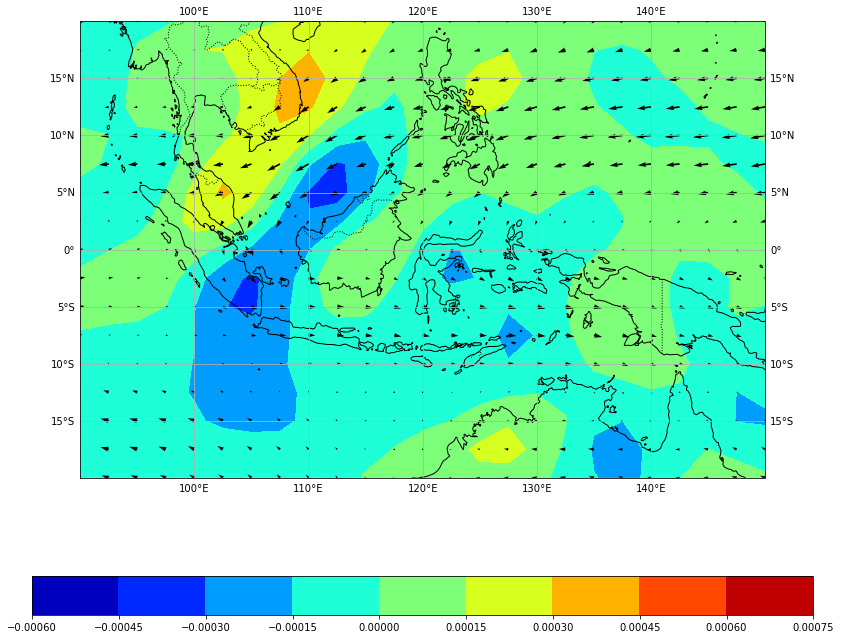

In [45]:
    #projection
    mproj=ccrs.PlateCarree()
    #figure dan axes 
    fig = plt.figure(1, figsize=(14, 12))
    ax = plt.axes(projection=mproj)

    #contourfill magnitude
    lvl=np.linspace(100,500,10)
    cf=ax.contourf(BQv_clim.lon, BQu_clim.lat,-1*hdiv[0,:,:],      #####konvergen kali -1, array numpy januari di 0
                   #cmap=plt.cm.bwr,                                ######biru wilayah konvergensi
                   cmap=plt.cm.jet,
                   transform=mproj)
                   #levels=lvl)
                   #zorder=2,
                   #alpha=0.65,)
    cb = plt.colorbar(cf, orientation='horizontal')#, pad=0, aspect=50)

    #vector
    qui=ax.quiver(xlon,ylat,BQu_clim[0,:,:],BQv_clim[0,:,:],transform=mproj)

    #tambahkan map feature
    ax.add_feature(cfeature.LAND)
    #ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent((90,150, -20, 20),crs=mproj)
    #grid line
    ax.gridlines(draw_labels=True)